In [1]:
import json
from pathlib import Path
import statistics
import matplotlib.pyplot as plt
from statistics import mean, stdev
import numpy as np
from datetime import datetime

# Directory path for dataset
path = r'C:\Users\Käyttäjä\DataProjects\DataProjects\data\polar_datadump'
directory = Path(path)

#Choose the starting year for analysis
start_date = "2018"

files = []
# Loop through all files in the directory
for file in directory.iterdir():
    # Check if the file is a activity file
    if file.is_file() and "activity" in file.name: #and vuosi in file.name:
        files.append(file.name)

print(len(files))

2613


In [2]:
#Collect MET values from the files and calculate daily energy expenditure. Add the dates and energy expenditures to a list.

energies = []
for file in files:
    dailyenergy = []
    totalenergy = 0
    pathsession = path + '\\' + file
    f = open(pathsession)
    data = json.load(f)
    date = data['date']
    date = datetime.strptime(date, "%Y-%m-%d")
    if date < datetime(2018, 1, 1):
        continue
    bodyweight = data['physicalInformation']['weight, kg']
    dailyenergy.append(date)
    mets_values = [sample['value'] for sample in data['samples']['mets']]
    for value in mets_values:    
        totalenergy = totalenergy + value * 0.5 * bodyweight / 60
    if totalenergy < 2000: continue
    dailyenergy.append(totalenergy)
    energies.append(dailyenergy)


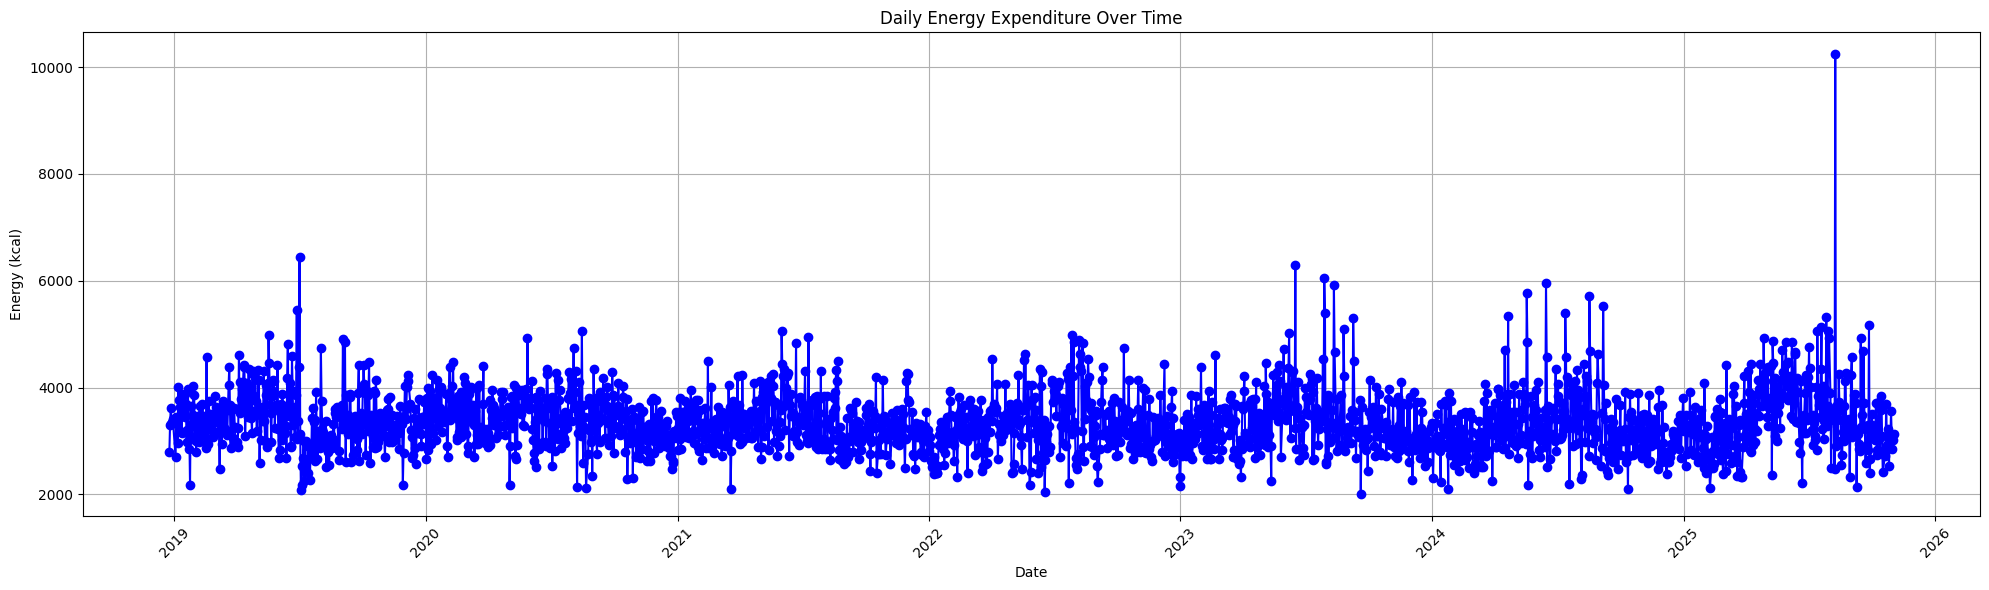

In [3]:
# Separate dates and energy values for plotting
dates = [entry[0] for entry in energies]

energy_values = [entry[1] for entry in energies]

# Plot the data
plt.figure(figsize=(20, 6))
plt.plot(dates, energy_values, marker='o', linestyle='-', color='b')
plt.title('Daily Energy Expenditure Over Time')
plt.xlabel('Date')
plt.ylabel('Energy (kcal)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [4]:
#Collect only the month from dates to calculate monthly averages
for i in range(len(energies)):
    month = energies[i][0].month 
    energies[i][0] = month
#print(energies)


tunnusluvut = [[],[],[],[],[],[],[],[],[],[],[],[]]
arvot = [[],[],[],[],[],[],[],[],[],[],[],[]] 

#add values to a list depending on the month. Months are marked by indexes of the list
for value in energies:
    kuukausi = int(value[0])
    arvot[kuukausi - 1].append(value[1])

#Calcualet means and SDs for monthly energy expenditure
tulokset = []
for i in range(len(arvot)):
    ka = mean(arvot[i])
    sd = stdev(arvot[i])
    tunnusluvut[i].append(ka)
    tunnusluvut[i].append(sd)

#print(tunnusluvut)

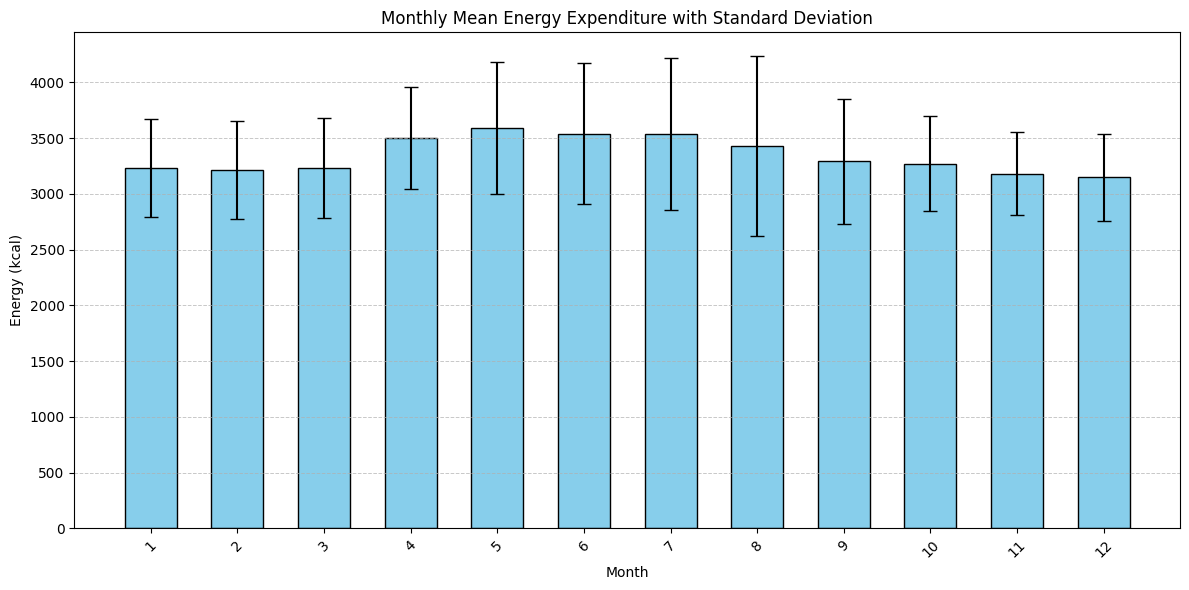

In [5]:
# Separate the means and standard deviations
means = [item[0] for item in tunnusluvut]
stdevs = [item[1] for item in tunnusluvut]

# Create x-axis labels
labels = [f'{i+1}' for i in range(len(tunnusluvut))]

# Set up the bar plot
x = np.arange(len(tunnusluvut))  # Ensure this has the same length as data
width = 0.6  # Width of the bars

# Plotting the bar graph with error bars
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(x, means, width, yerr=stdevs, capsize=5, color='skyblue', edgecolor='black')

# Adding labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Energy (kcal)')
ax.set_title('Monthly Mean Energy Expenditure with Standard Deviation')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.grid(True, axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Adding a grid
ax.yaxis.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [6]:
#Lets do the same as previously but now separating data by seasons.

kuukausiarvot = [[],[],[],[]]
tunnusluvut = [[],[],[],[]]

for arvo in energies:
    arvo[0] = int(arvo[0])
    
for arvo in energies:
    if arvo[0] in (12, 1, 2):
        kuukausiarvot[0].append(arvo[1])
    if arvo[0] in (3, 4, 5):
        kuukausiarvot[1].append(arvo[1])
    if arvo[0] in (6, 7, 8):
        kuukausiarvot[2].append(arvo[1])
    if arvo[0] in (9, 10, 11):
        kuukausiarvot[3].append(arvo[1])

for i in range(len(kuukausiarvot)):
    ka = mean(kuukausiarvot[i])
    sd = stdev(kuukausiarvot[i])
    tunnusluvut[i].append(ka)
    tunnusluvut[i].append(sd)

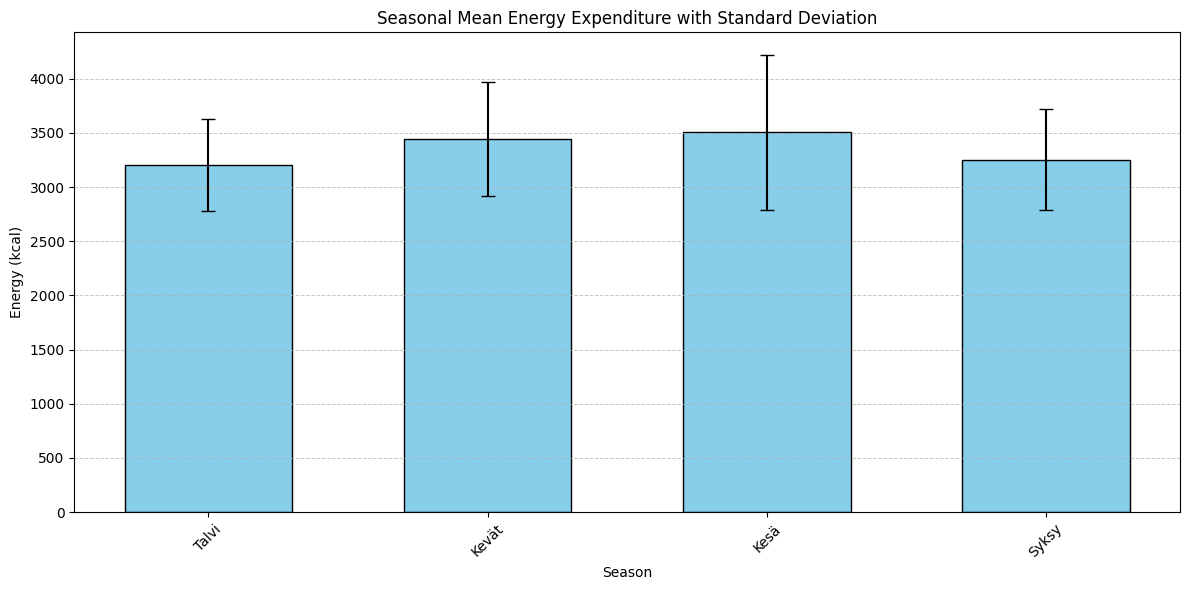

In [7]:
# Separate the means and standard deviations
means = [item[0] for item in tunnusluvut]
stdevs = [item[1] for item in tunnusluvut]

# Create x-axis labels
labels = ["Talvi", "Kevät", "Kesä", "Syksy"]

# Set up the bar plot
x = np.arange(len(tunnusluvut))  # Ensure this has the same length as data
width = 0.6  # Width of the bars

# Plotting the bar graph with error bars
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(x, means, width, yerr=stdevs, capsize=5, color='skyblue', edgecolor='black')

# Adding labels and title
ax.set_xlabel('Season')
ax.set_ylabel('Energy (kcal)')
ax.set_title('Seasonal Mean Energy Expenditure with Standard Deviation')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.grid(True, axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Adding a grid
ax.yaxis.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

# Run anova and post hoc for seasonal

In [8]:
import scipy.stats as stats

#Separate monthly values to own variables
talvi = kuukausiarvot[0]
kevät = kuukausiarvot[1]
kesä = kuukausiarvot[2]
syksy = kuukausiarvot[3]

# Perform one-way ANOVA
f_value, p_value = stats.f_oneway(talvi, kevät, kesä, syksy)

print(f'F-value: {f_value}')
print(f'P-value: {p_value}')

# Check if the result is statistically significant
alpha = 0.05
if p_value < alpha:
    print("The differences between the groups are statistically significant.")
else:
    print("The differences between the groups are not statistically significant.")

F-value: 42.920889870992816
P-value: 5.100715500536395e-27
The differences between the groups are statistically significant.


In [9]:
import statsmodels.stats.multicomp as mc
import numpy as np
import pandas as pd

# Combine data into a single array and create group labels
data = talvi + kevät + kesä + syksy
groups = ['Talvi']*len(talvi) + ['Kevät']*len(kevät) + ['Kesä']*len(kesä) + ['Syksy']*len(syksy)

# Create a DataFrame
df = pd.DataFrame({'Energy': data, 'Season': groups})

# Perform Tukey's HSD test
tukey = mc.pairwise_tukeyhsd(df['Energy'], df['Season'], alpha=0.05)

print(f'Keskiarvokulutus: {round(mean(energy_values))}')
print(f'Keskihajonta: {round(stdev(energy_values))}\n')
print('Talvi Kevät Kesä Syksy')
print('----------------------')
print(f'{round(mean(talvi))}  {round(mean(kevät))}  {round(mean(kesä))}  {round(mean(syksy))} \n')
print(tukey)



Keskiarvokulutus: 3353
Keskihajonta: 559

Talvi Kevät Kesä Syksy
----------------------
3201  3440  3504  3253 

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
  Kesä  Kevät  -63.7708 0.1641 -143.0656   15.5239  False
  Kesä  Syksy -251.3682    0.0 -332.2345 -170.5019   True
  Kesä  Talvi -302.7193    0.0  -383.656 -221.7826   True
 Kevät  Syksy -187.5974    0.0 -267.7126 -107.4821   True
 Kevät  Talvi -238.9485    0.0 -319.1347 -158.7623   True
 Syksy  Talvi  -51.3511 0.3702 -133.0918   30.3895  False
---------------------------------------------------------
